In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^DJI'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-13 00:00:00-05:00,33887.390625,34331.468750,33517.730469,33826.691406,1479380000,0.0,0.0
2023-02-20 00:00:00-05:00,33699.691406,33699.691406,32643.480469,32816.921875,1235470000,0.0,0.0
2023-02-27 00:00:00-05:00,32906.160156,33405.820312,32500.710938,33390.968750,1457730000,0.0,0.0
2023-03-06 00:00:00-05:00,33425.320312,33572.218750,31783.410156,31909.640625,1584990000,0.0,0.0
2023-03-13 00:00:00-04:00,31819.929688,32306.589844,31429.820312,31861.980469,2394800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00-05:00,41924.679688,43653.250000,41844.890625,43487.828125,2493090000,0.0,0.0
2025-01-20 00:00:00-05:00,43528.648438,44565.261719,43528.648438,44424.250000,2157050000,0.0,0.0
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-10 00:00:00-05:00,29436.029297,29535.400391,29283.179688,29398.080078,522150000,0.0,0.0
2020-02-17 00:00:00-05:00,29282.779297,29409.089844,28892.699219,28992.410156,1096230000,0.0,0.0
2020-02-24 00:00:00-05:00,28402.929688,28402.929688,24681.009766,25409.359375,3019270000,0.0,0.0
2020-03-02 00:00:00-05:00,25590.509766,27102.339844,25226.619141,25864.779297,2819020000,0.0,0.0
2020-03-09 00:00:00-04:00,24992.359375,25020.990234,21154.460938,23185.619141,3820590000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00-05:00,41924.679688,43653.250000,41844.890625,43487.828125,2493090000,0.0,0.0
2025-01-20 00:00:00-05:00,43528.648438,44565.261719,43528.648438,44424.250000,2157050000,0.0,0.0
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-02-10 00:00:00-05:00,29436.029297,29535.400391,29283.179688,29398.080078,522150000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-17 00:00:00-05:00,29282.779297,29409.089844,28892.699219,28992.410156,1096230000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,28402.929688,28402.929688,24681.009766,25409.359375,3019270000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-02 00:00:00-05:00,25590.509766,27102.339844,25226.619141,25864.779297,2819020000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-09 00:00:00-04:00,24992.359375,25020.990234,21154.460938,23185.619141,3820590000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13 00:00:00-05:00,41924.679688,43653.250000,41844.890625,43487.828125,2493090000,0.0,0.0,42213.699219,41229.753906,43204.985352,38266.906738,46167.832520
2025-01-20 00:00:00-05:00,43528.648438,44565.261719,43528.648438,44424.250000,2157050000,0.0,0.0,42332.875000,41436.105469,43402.718750,38486.185547,46352.638672
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0,42542.439453,41656.920898,43477.118164,38926.625000,46207.414062


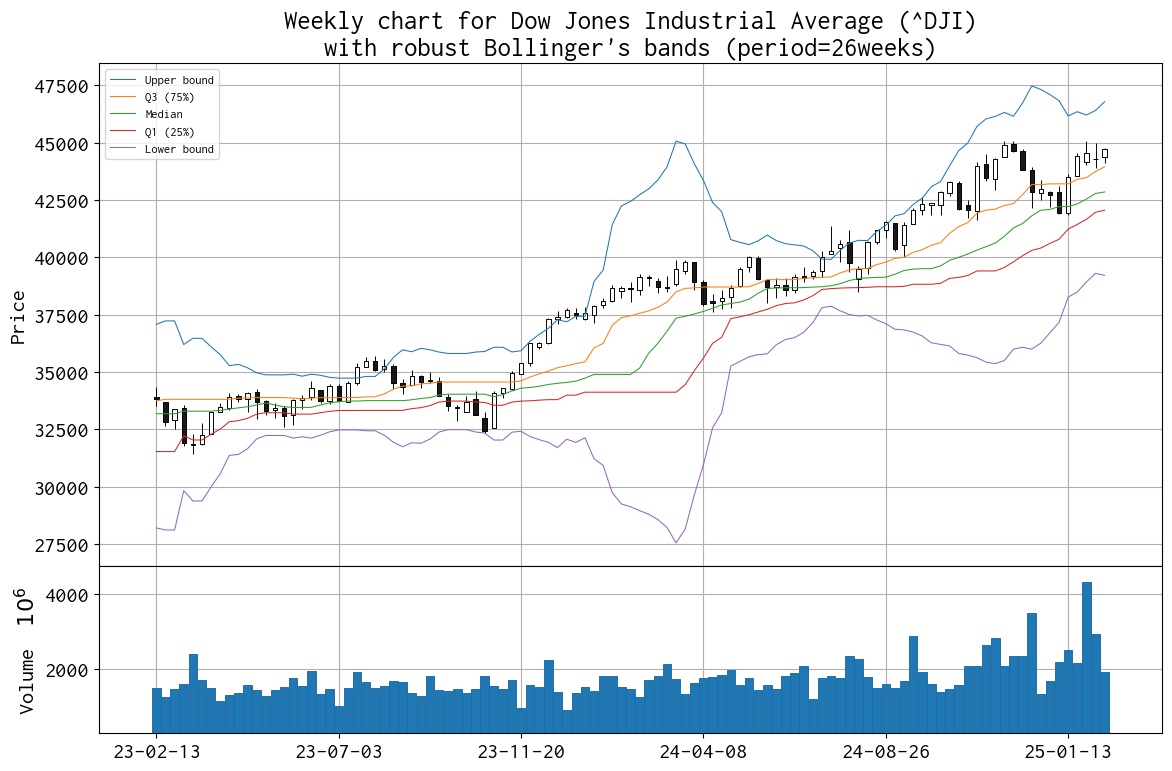

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_dji.png')
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00-05:00,41924.679688,43653.250000,41844.890625,43487.828125,2493090000,0.0,0.0
2025-01-20 00:00:00-05:00,43528.648438,44565.261719,43528.648438,44424.250000,2157050000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-01-13 00:00:00-05:00    43487.828125
2025-01-20 00:00:00-05:00    44424.250000
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00-05:00           NaN
2025-01-20 00:00:00-05:00    936.421875
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-20 00:00:00-05:00    895.601562
dtype: float64

In [9]:
df['Close'].rolling(13).mean()

Date
2023-01-23 00:00:00-05:00             NaN
2023-01-30 00:00:00-05:00             NaN
2023-02-06 00:00:00-05:00             NaN
2023-02-13 00:00:00-05:00             NaN
2023-02-20 00:00:00-05:00             NaN
                                 ...     
2024-12-23 00:00:00-05:00    43354.099760
2024-12-30 00:00:00-05:00    43383.282752
2025-01-06 00:00:00-05:00    43312.097356
2025-01-13 00:00:00-05:00    43328.398738
2025-01-20 00:00:00-05:00    43506.079627
Name: Close, Length: 105, dtype: float64

In [10]:
df['Close'].rolling(26).mean()

Date
2023-01-23 00:00:00-05:00             NaN
2023-01-30 00:00:00-05:00             NaN
2023-02-06 00:00:00-05:00             NaN
2023-02-13 00:00:00-05:00             NaN
2023-02-20 00:00:00-05:00             NaN
                                 ...     
2024-12-23 00:00:00-05:00    42023.277194
2024-12-30 00:00:00-05:00    42152.364032
2025-01-06 00:00:00-05:00    42226.885216
2025-01-13 00:00:00-05:00    42349.973558
2025-01-20 00:00:00-05:00    42497.470102
Name: Close, Length: 105, dtype: float64

In [11]:
df['Close'].rolling(52).mean()

Date
2023-01-23 00:00:00-05:00             NaN
2023-01-30 00:00:00-05:00             NaN
2023-02-06 00:00:00-05:00             NaN
2023-02-13 00:00:00-05:00             NaN
2023-02-20 00:00:00-05:00             NaN
                                 ...     
2024-12-30 00:00:00-05:00    40471.461163
2025-01-06 00:00:00-05:00    40555.027870
2025-01-13 00:00:00-05:00    40663.182242
2025-01-20 00:00:00-05:00    40784.621094
2025-01-27 00:00:00-05:00    40901.408203
Name: Close, Length: 106, dtype: float64

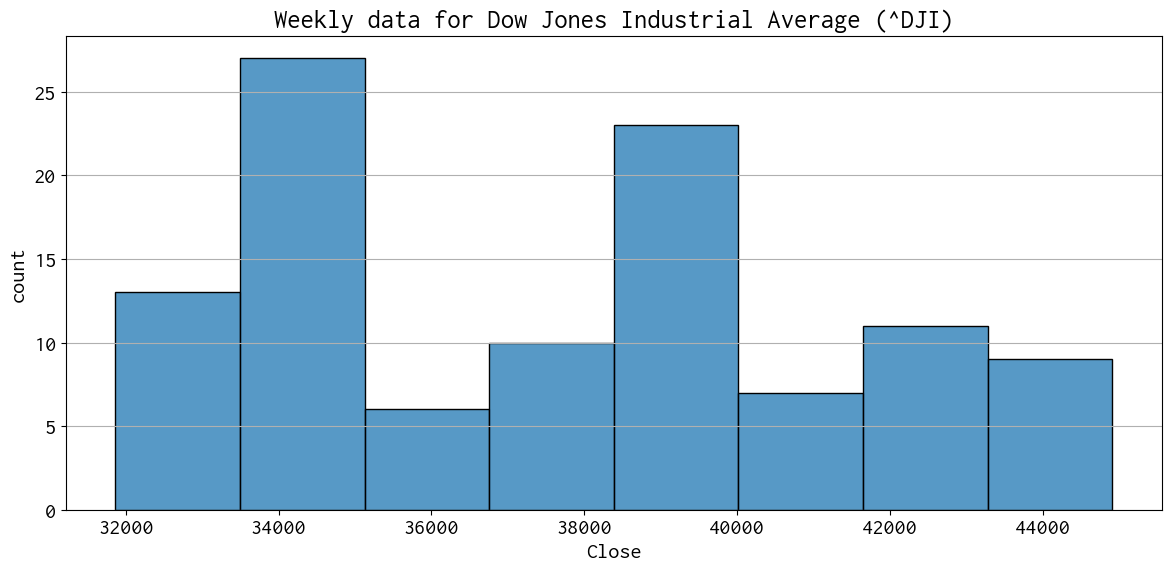

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_n225.png')
plt.show()

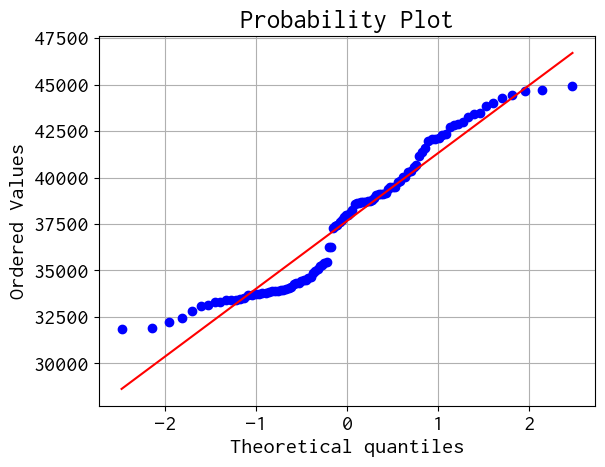

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

106

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9323474341359779, p-value: 4.1311145520707034e-05
